In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install scikit-learn

# Objetivo: Determinar patrones de consumo de energía en distintas localidades y predecir futuras demandas para optimizar la distribución y evitar sobrecargas o interrupciones.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import sklearn

# Exploracion de datos

In [ ]:
melb_df = pd.read_csv('proyecto.csv')
melb_df

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2020,1,3930642,1251191,7768.76,lunes,01/27/2020 02:15:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2020,1,103897,36304,227.04,miércoles,01/22/2020 07:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACÁ (ANM),91798000,TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS),2020,1,22864,9277,88.96,jueves,01/30/2020 07:30:00 PM,10.19
3,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873001,SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...,2020,1,5617,1381,53.66,jueves,01/23/2020 07:45:00 PM,4.13
4,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873002,VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA),2020,1,2217,539,39.07,miércoles,01/29/2020 07:45:00 PM,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2023,6,23364,9927,84.92,viernes,06/09/2023 06:30:00 PM,12.17
3290,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2023,6,1325908,361584,2882.40,martes,06/13/2023 12:00:00 PM,24.00
3291,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2023,6,31932,10264,132.97,miércoles,06/28/2023 12:30:00 PM,10.86
3292,99,VICHADA,99773,CUMARIBO,99773000,CUMARIBO (CUMARIBO - VICHADA),2023,6,308892,124088,660.00,viernes,06/09/2023 02:45:00 PM,24.00


In [ ]:
melb_df.columns

Index(['ID DEPATAMENTO', 'DEPARTAMENTO', 'ID MUNICIPIO', 'MUNICIPIO',
       'ID LOCALIDAD', 'LOCALIDAD', 'AÑO SERVICIO', 'MES SERVICIO',
       'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA',
       'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA',
       'PROMEDIO DIARIO EN HORAS'],
      dtype='object')

In [ ]:
melb_df.describe()

,ID DEPATAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,3294.000000,3294.000000,3.294000e+03,3294.000000,3294.000000,3.294000e+03,3.294000e+03,3.294000e+03,3294.000000
mean,45.601700,46008.681542,4.600873e+07,2021.275956,6.053734,3.628131e+05,1.072491e+05,1.838501e+03,12.023604
std,29.164858,29131.144975,2.913113e+07,1.024474,3.460483,1.786971e+06,4.767422e+05,4.812798e+04,7.343238
min,5.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,19.000000,19809.000000,1.980903e+07,2020.000000,3.000000,5.402000e+03,2.113250e+03,3.476750e+01,6.300000
50%,27.000000,27800.000000,2.780000e+07,2021.000000,6.000000,1.336500e+04,5.625500e+03,7.590500e+01,8.540000
75%,52.000000,52835.000000,5.283522e+07,2022.000000,9.000000,8.397025e+04,3.080350e+04,2.238000e+02,19.275000
max,99.000000,99773.000000,9.977300e+07,2023.000000,12.000000,1.859779e+07,4.904871e+06,2.694319e+06,24.000000


# Limpieza de datos

In [ ]:
#validamos si alguna fila tiene valores nulos
melb_df = melb_df.dropna(axis = 0)
melb_df

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2020,1,3930642,1251191,7768.76,lunes,01/27/2020 02:15:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2020,1,103897,36304,227.04,miércoles,01/22/2020 07:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACÁ (ANM),91798000,TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS),2020,1,22864,9277,88.96,jueves,01/30/2020 07:30:00 PM,10.19
3,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873001,SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...,2020,1,5617,1381,53.66,jueves,01/23/2020 07:45:00 PM,4.13
4,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873002,VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA),2020,1,2217,539,39.07,miércoles,01/29/2020 07:45:00 PM,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2023,6,23364,9927,84.92,viernes,06/09/2023 06:30:00 PM,12.17
3290,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2023,6,1325908,361584,2882.40,martes,06/13/2023 12:00:00 PM,24.00
3291,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2023,6,31932,10264,132.97,miércoles,06/28/2023 12:30:00 PM,10.86
3292,99,VICHADA,99773,CUMARIBO,99773000,CUMARIBO (CUMARIBO - VICHADA),2023,6,308892,124088,660.00,viernes,06/09/2023 02:45:00 PM,24.00


In [ ]:
print(melb_df.head())

   ID DEPATAMENTO DEPARTAMENTO  ID MUNICIPIO         MUNICIPIO  ID LOCALIDAD  \
0              91     AMAZONAS         91001           LETICIA      91001000   
1              91     AMAZONAS         91540     PUERTO NARIÑO      91540000   
2              91     AMAZONAS         91798    TARAPACÁ (ANM)      91798000   
3               5    ANTIOQUIA          5873  VIGÍA DEL FUERTE       5873001   
4               5    ANTIOQUIA          5873  VIGÍA DEL FUERTE       5873002   

                                           LOCALIDAD  AÑO SERVICIO  \
0                       LETICIA (LETICIA - AMAZONAS)          2020   
1           PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)          2020   
2               TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS)          2020   
3  SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...          2020   
4              VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA)          2020   

   MES SERVICIO  ENERGÍA ACTIVA  ENERGÍA REACTIVA  POTENCIA MÁXIMA  \
0             1         3930

In [ ]:
from sklearn.preprocessing import LabelEncoder

# cambio de categoricas a numericas
le = LabelEncoder()
melb_df['DÍA DE DEMANDA MÁXIMA'] = le.fit_transform(melb_df['DÍA DE DEMANDA MÁXIMA'])
melb_df['FECHA DE DEMANDA MÁXIMA'] = le.fit_transform(melb_df['FECHA DE DEMANDA MÁXIMA'])

# validacion de PCA de las variables

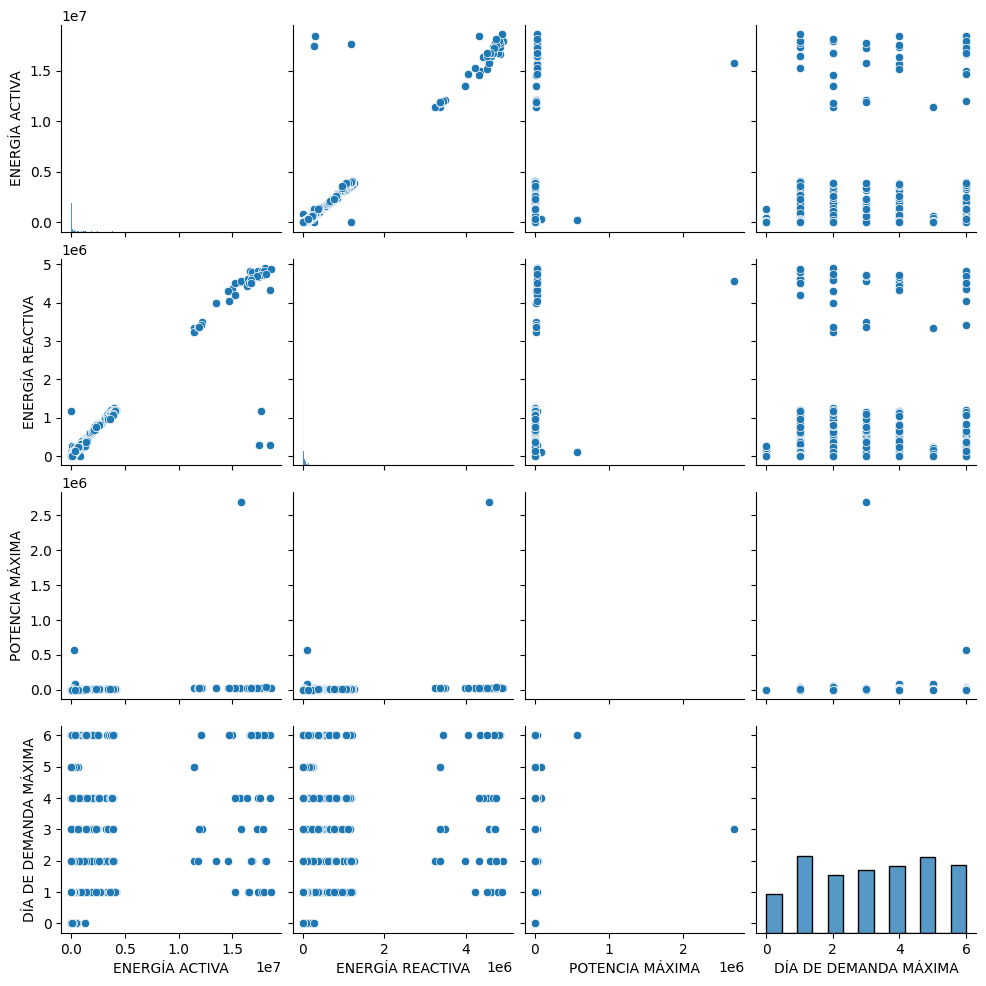

In [ ]:
X_cols = ['ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA', 'DÍA DE DEMANDA MÁXIMA']
melb_df_filtrado = melb_df[columnas_interes]

# Crear un pair plot
sns.pairplot(melb_df_filtrado)
plt.show()

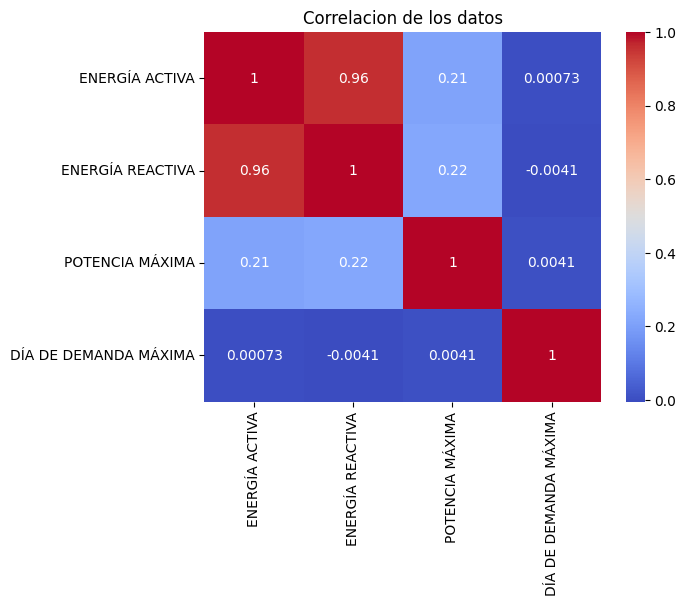

In [ ]:
corr_matrix = melb_df[X_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlacion de los datos")
plt.show()

# uso del algoritmo K-means.

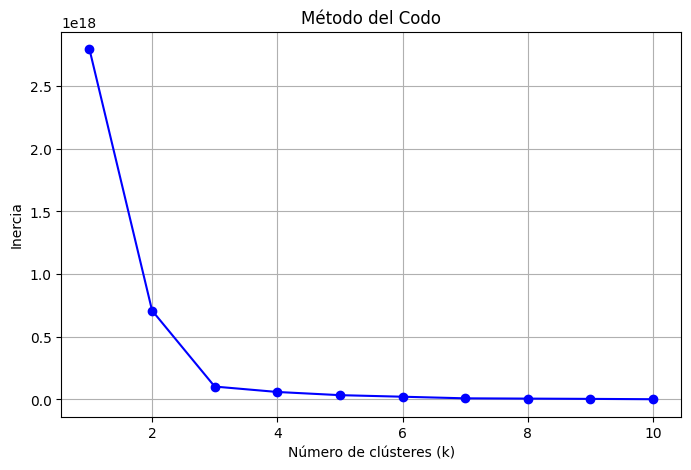

In [ ]:
# Implementar el método del codo
from sklearn.cluster import KMeans
X = melb_df[['ID LOCALIDAD', "ID MUNICIPIO"]].values

def metodo_del_codo(X, max_clusters=10):
    inercia = []
    range_clusters = range(1, max_clusters + 1)

    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inercia.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, inercia, 'bo-')
    plt.title("Método del Codo")
    plt.xlabel("Número de clústeres (k)")
    plt.ylabel("Inercia")
    plt.grid(True)
    plt.show()

# Ejecutar el método del codo
metodo_del_codo(X, max_clusters=10)

ingrese el numero de cluster :/n 3


el numero ingresado es : 3
Centroides: [[2.24637647e+07 2.24637177e+04]
 [9.19272184e+07 9.19272137e+04]
 [5.17452674e+07 5.17451746e+04]]


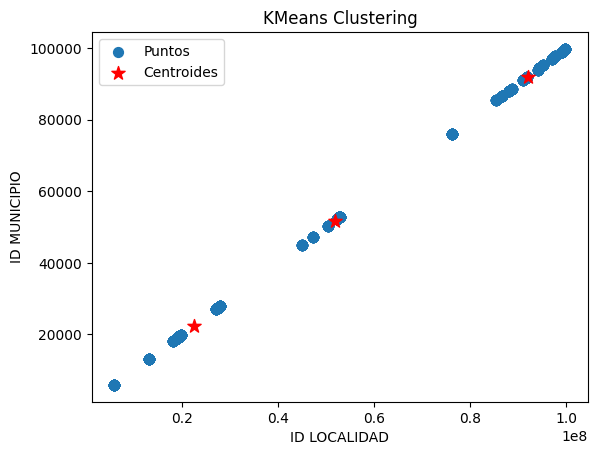

In [ ]:
from sklearn.cluster import KMeans

k = int(input("ingrese el numero de cluster :/n"))
print("el numero ingresado es :", k)

kmeans = KMeans(n_clusters=k).fit(X)
centroids=kmeans.cluster_centers_
print("Centroides:", centroids)

plt.scatter(X[:, 0], X[:, 1], s=50, label='Puntos')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroides')
plt.title("KMeans Clustering")
plt.xlabel("ID LOCALIDAD")
plt.ylabel("ID MUNICIPIO")
plt.legend()
plt.show()

In [ ]:
clust=kmeans.predict(X)
print(clust)

[1 1 1 ... 1 1 1]


# validacion de anomalias

In [ ]:
melb_df.loc[np.random.choice(melb_df.index, size=20, replace=False), 'ENERGÍA ACTIVA'] *= 3  # Anomalías en energía activa
melb_df.loc[np.random.choice(melb_df.index, size=20, replace=False), 'ENERGÍA REACTIVA'] *= 2  # Anomalías en energía reactiva

In [ ]:
# Normalizar las columnas numéricas
from sklearn.preprocessing import StandardScaler

# Machin learning

In [ ]:
from sklearn.model_selection import train_test_split
Y = melb_df["ENERGÍA ACTIVA"]

X = melb_df[["POTENCIA MÁXIMA", "PROMEDIO DIARIO EN HORAS", "ENERGÍA REACTIVA", 'DÍA DE DEMANDA MÁXIMA']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X)
print(Y)

      POTENCIA MÁXIMA  PROMEDIO DIARIO EN HORAS  ENERGÍA REACTIVA  \
0             7768.76                     24.00           1251191   
1              227.04                     24.00             36304   
2               88.96                     10.19              9277   
3               53.66                      4.13              1381   
4               39.07                      3.17               539   
...               ...                       ...               ...   
3289            84.92                     12.17              9927   
3290          2882.40                     24.00            361584   
3291           132.97                     10.86             10264   
3292           660.00                     24.00            124088   
3293          4871.68                     23.85            758457   

      DÍA DE DEMANDA MÁXIMA  
0                         2  
1                         4  
2                         1  
3                         1  
4                    

# Entrenamiento del modelo

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


modelo = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

modelo.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
print("primera prediccion")
print(X.head())
print("total de consumo Activo")
print(Y.head())
print("las predicciones de consumo seria")
print(modelo.predict(X.head()))

primera prediccion
   POTENCIA MÁXIMA  PROMEDIO DIARIO EN HORAS  ENERGÍA REACTIVA  \
0          7768.76                     24.00           1251191   
1           227.04                     24.00             36304   
2            88.96                     10.19              9277   
3            53.66                      4.13              1381   
4            39.07                      3.17               539   

   DÍA DE DEMANDA MÁXIMA  
0                      2  
1                      4  
2                      1  
3                      1  
4                      4  
total de consumo Activo
0    3930642
1     103897
2      22864
3       5617
4       2217
Name: ENERGÍA ACTIVA, dtype: int64
las predicciones de consumo seria
[3.849566e+06 1.038970e+05 2.286400e+04 5.617000e+03 2.217000e+03]


# validacion

In [ ]:
from sklearn.metrics import mean_absolute_error
test_predictions = modelo.predict(X_test)
print(mean_absolute_error(Y_test, test_predictions))

48550.52503793627
